In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levy_stable
from scipy import stats

import math

In [2]:
data_vkco = pd.read_csv("VKCO.IL.csv")
data_tcs_il = pd.read_csv("TCS.IL.csv")
data_poly_il = pd.read_csv("POLY.L.csv")
data_five_il = pd.read_csv("FIVE.IL.csv")


### Equation transforms a price series p into a log-returns r series for each asset:

In [3]:
def get_log_return(dataframe, column):
    log_return = []
    data = dataframe[column]
    for i in range(1, len(data)):
        log_return.append(np.log(data[i] / data[i - 1]))
    return log_return

In [4]:
log_return_vkco = pd.DataFrame({'log_return_vkco': get_log_return(data_vkco, 'Close')})
log_return_tcs_il = pd.DataFrame({'log_return_tcs_il': get_log_return(data_tcs_il, 'Close')})
log_return_poly_il = pd.DataFrame({'log_return_poly_il': get_log_return(data_poly_il, 'Close')})
log_return_five_il = pd.DataFrame({'log_return_five_il': get_log_return(data_five_il, 'Close')})

### Проверка на нормальное распределение критерием Шапиро-Уилка

In [6]:
res_vkco = stats.shapiro(pd.DataFrame({'log_return': log_return_vkco['log_return_vkco']}))
res_tcs_il = stats.shapiro(pd.DataFrame({'log_return': log_return_tcs_il['log_return_tcs_il']}))
res_poly_il = stats.shapiro(pd.DataFrame({'log_return': log_return_poly_il['log_return_poly_il']}))
res_five_il = stats.shapiro(pd.DataFrame({'log_return': log_return_five_il['log_return_five_il']}))

print('p-value:')
print('vkco:', res_vkco[1])
print('tcs_il:', res_tcs_il[1])
print('poly_il:', res_poly_il[1])
print('five_il:', res_five_il[1])

p-value:
vkco: 6.867368007590358e-09
tcs_il: 4.4525447307560036e-15
poly_il: 4.1895285851634156e-11
five_il: 1.3064079169584214e-13


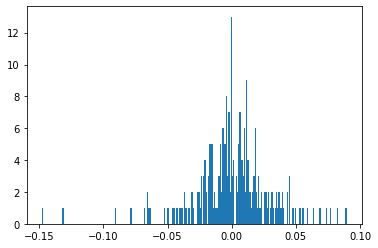

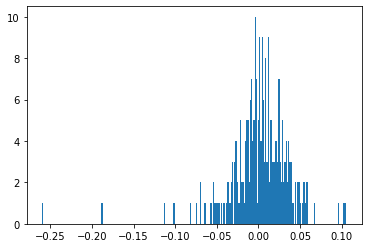

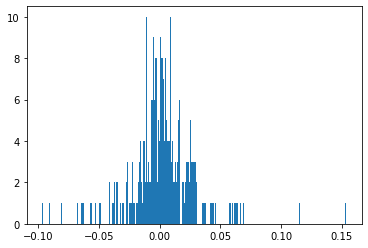

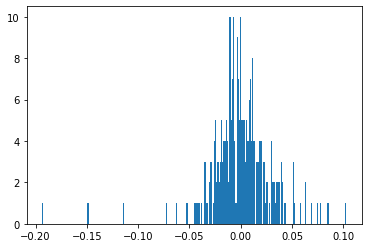

In [18]:
for item in [log_return_vkco, log_return_tcs_il, log_return_poly_il, log_return_five_il]:
    plt.figure()
    plt.hist(item, bins=255, label='hst')

In [8]:
def show_corr(dataframe):
    plt.figure(figsize=(22,18), dpi= 50)
    sns.heatmap(dataframe.corr(), xticklabels=dataframe.corr().columns, yticklabels=dataframe.corr().columns, cmap='RdYlGn', center=0, annot=True)

    # Decorations
    plt.title('Correlogram of mtcars', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

In [21]:
all_data = pd.DataFrame()
all_data = pd.concat([log_return_vkco, log_return_tcs_il, log_return_poly_il, log_return_five_il], axis=1)
all_data.to_csv('log_return_data.csv', index=False)
all_data

,log_return_vkco,log_return_tcs_il,log_return_poly_il,log_return_five_il
0,-0.012110,-0.004162,-0.003712,-0.013377
1,-0.035292,0.000000,-0.029352,-0.024070
2,0.011583,0.002083,-0.013279,0.007894
3,-0.006740,0.004154,0.025964,-0.002916
4,-0.009709,0.015425,-0.010984,-0.007034
...,...,...,...,...
248,-0.007648,0.018653,0.030041,0.010193
249,0.019012,0.044184,0.029452,-0.006216
250,0.018657,0.038540,0.008584,0.036732
251,0.046940,0.035287,0.042393,0.000000


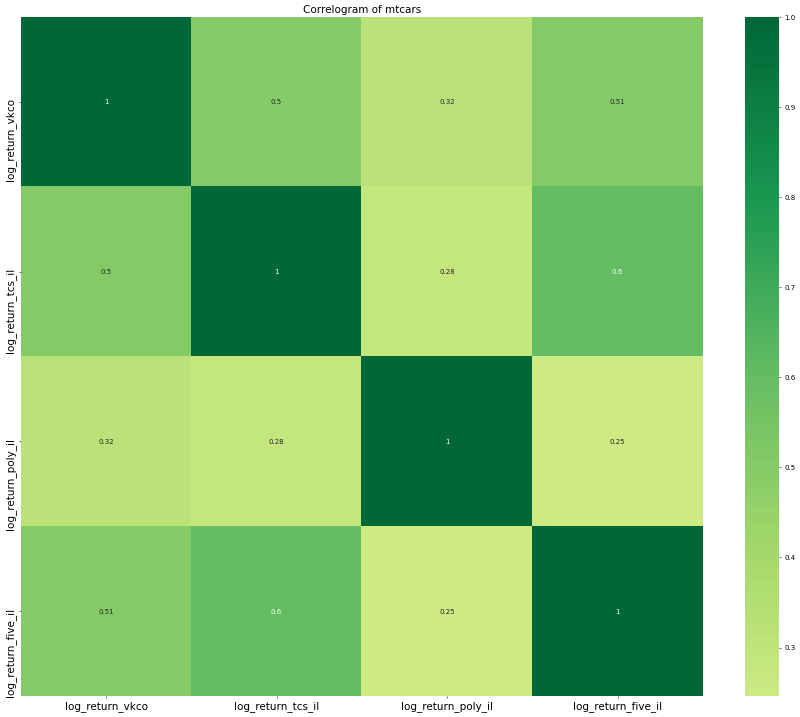

In [10]:
show_corr(all_data)

### Оценка параметров

##### Сдвигаем на -E[X]


In [11]:
def get_expected_value(dataframe):
    return dataframe.mean()

In [12]:
def math_expectation_shift(dataframe):
    return dataframe - get_expected_value(dataframe)

Expected value: log_return_vkco    0.001158
dtype: float64
Expected value: log_return_tcs_il    0.001443
dtype: float64
Expected value: log_return_poly_il    0.001734
dtype: float64
Expected value: log_return_five_il    0.00015
dtype: float64


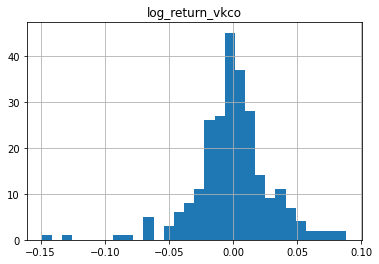

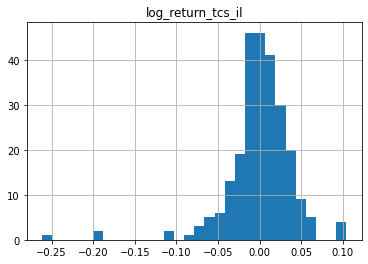

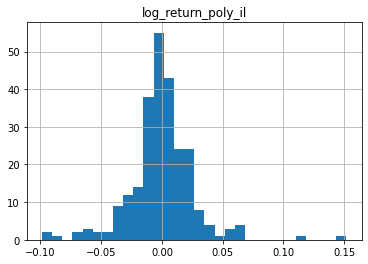

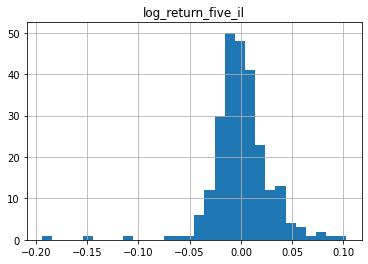

In [15]:
for item in [log_return_vkco, log_return_tcs_il, log_return_poly_il, log_return_five_il]:
    print('Expected value:', (get_expected_value(item)))
    math_expectation_shift(item).hist(bins=30)

In [22]:
all_data = pd.DataFrame()
all_data = pd.concat([log_return_vkco, 
                      log_return_tcs_il), 
                      math_expectation_shift(log_return_poly_il), 
                      math_expectation_shift(log_return_five_il)], axis=1)
all_data.to_csv('log_return_data.csv', index=False)
all_data

,log_return_vkco,log_return_tcs_il,log_return_poly_il,log_return_five_il
0,-0.013268,-0.005606,-0.005446,-0.013527
1,-0.036450,-0.001443,-0.031087,-0.024220
2,0.010426,0.000640,-0.015014,0.007743
3,-0.007898,0.002710,0.024230,-0.003066
4,-0.010866,0.013981,-0.012719,-0.007184
...,...,...,...,...
248,-0.008806,0.017210,0.028307,0.010042
249,0.017854,0.042740,0.027718,-0.006367
250,0.017500,0.037097,0.006849,0.036582
251,0.045782,0.033843,0.040659,-0.000150


### Построение характеристической функции

In [13]:
def characteristic_func(dataframe):
    plt.plot(dataframe.index, dataframe.sort_values(by=[dataframe.columns[0]]))
    plt.show()

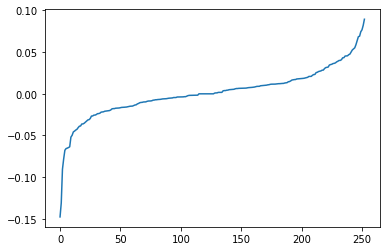

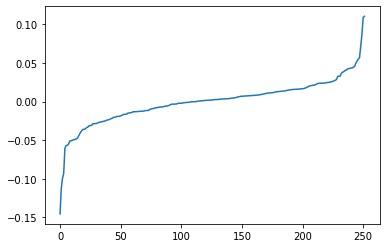

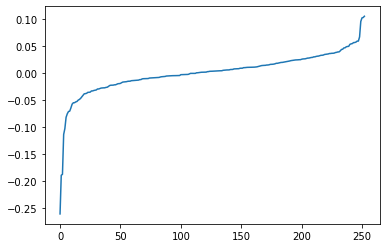

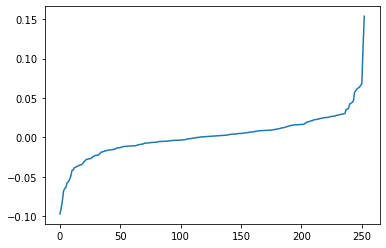

In [14]:
characteristic_func(log_return_vkco)
characteristic_func(log_return_five_il)
characteristic_func(log_return_tcs_il)
characteristic_func(log_return_poly_il)

### Нахождение параметров alpha и sigma

In [15]:
def func_log_log(dataframe):
    return np.log(-np.log((dataframe ** 2)))

In [16]:
func_opt_five_il = func_log_log(log_return_five_il)
func_opt_five_il

,log_return_yndx
0,2.869910
1,2.737223
2,2.160556
3,2.504982
4,2.092436
...,...
247,2.135423
248,2.179995
249,1.746347
250,1.971398
